In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Python Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (8, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

1.5.2


In [ ]:
pip install lime

In [ ]:
!pip install phik
#pip install missingno
!pip install category_encoders
!pip install -q shap
!pip install xgboost

In [ ]:
pip install torch torchvision sklearn matplotlib seaborn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
import category_encoders as ce
from phik import phik_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, RFECV, SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from scipy.stats import uniform

import shap
shap.initjs()

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import lime
import lime.lime_tabular
import torch

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_chicago_data.csv')
df.head(2)

,description,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,...,pct_not_working_age,per_capita_income,hardship_index,population,pop_density,distance_to_police_station,distance_to_park,distance_to_school,distance_to_vacant_building,distance_to_library
0,OVER $500,False,False,1912,19.0,47.0,3.0,2019,41.963383,-87.671457,...,22.2,35787,20.0,57182.0,24647.41,0.025559,0.004347,0.002689,0.011154,0.013244
1,TO PROPERTY,False,True,312,3.0,20.0,42.0,2020,41.779679,-87.613195,...,36.1,18672,58.0,24425.0,11799.52,0.015198,0.006691,0.003981,0.003460,0.006103


In [ ]:
df.shape

(142012, 35)

In [ ]:
# #Taking a stratisfied portion of the data and renaming the data
df = df.sample(frac=0.5, random_state=42)

len(df)

71006

In [ ]:
df.columns

Index(['description', 'arrest', 'domestic', 'beat', 'district', 'ward',
       'community_area', 'year', 'latitude', 'longitude', 'crime_category',
       'hour', 'day_of_week', 'month', 'season', 'is_weekend', 'is_holiday',
       'time_of_day', 'Is_STR', 'Is_OTH_STR', 'loc_desc_cat',
       'pct_housing_crowded', 'pct_households_below_poverty',
       'pct_age16_unemployed', 'pct_age25_nohighschool', 'pct_not_working_age',
       'per_capita_income', 'hardship_index', 'population', 'pop_density',
       'distance_to_police_station', 'distance_to_park', 'distance_to_school',
       'distance_to_vacant_building', 'distance_to_library'],
      dtype='object')

In [ ]:
# Convert all boolean columns in the DataFrame to numerical (1/0)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Label Encoding for Primary Type
le = LabelEncoder()

df["loc_desc_cat"] = le.fit_transform(df["loc_desc_cat"])
df["description"] = le.fit_transform(df["description"])
df["time_of_day"] = le.fit_transform(df["time_of_day"])
#chicago_df["crime_class"] = le.fit_transform(chicago_df["crime_class"])
df["crime_category"] = le.fit_transform(df["crime_category"])
#df["primary_type"] = le.fit_transform(df["primary_type"])

df.head(1)

,description,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,...,pct_not_working_age,per_capita_income,hardship_index,population,pop_density,distance_to_police_station,distance_to_park,distance_to_school,distance_to_vacant_building,distance_to_library
124675,137,0,1,1722,17.0,39.0,14.0,2022,41.966593,-87.734323,...,32.0,21323,53.0,48396.0,25206.25,0.006232,0.005968,0.007696,0.005013,0.004001


In [ ]:
df.shape

(71006, 35)

In [ ]:
df.columns

Index(['description', 'arrest', 'domestic', 'beat', 'district', 'ward',
       'community_area', 'year', 'latitude', 'longitude', 'crime_category',
       'hour', 'day_of_week', 'month', 'season', 'is_weekend', 'is_holiday',
       'time_of_day', 'Is_STR', 'Is_OTH_STR', 'loc_desc_cat',
       'pct_housing_crowded', 'pct_households_below_poverty',
       'pct_age16_unemployed', 'pct_age25_nohighschool', 'pct_not_working_age',
       'per_capita_income', 'hardship_index', 'population', 'pop_density',
       'distance_to_police_station', 'distance_to_park', 'distance_to_school',
       'distance_to_vacant_building', 'distance_to_library'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Define feature matrix X and target vector y for classification
X_columns = ['description', 'domestic', 'arrest', 'is_weekend', 'hour', 'year', 'longitude', 'latitude',
     'distance_to_vacant_building', 'distance_to_police_station', 'distance_to_school',


                                ]

y_column = 'crime_category'

# Prepare feature and target arrays
X = df[X_columns].values
y = df[y_column].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Transform data into 14-day windows
seq_length = 14  # Number of days to use for prediction
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)
X_seq, y_seq = create_sequences(X, y, seq_length)
X_seq = X_seq.reshape(X_seq.shape[0], seq_length, -1)

In [ ]:
# Step 1: Balancing the Dataset
data = pd.DataFrame(X_seq.reshape(X_seq.shape[0], -1))  # Flatten the features
data['label'] = y_seq
# Separate majority and minority classes
majority = data[data.label == 0]  # Violent crime
minority = data[data.label == 1]  # Non-Violent crime
# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=123)
upsampled = pd.concat([majority, minority_upsampled])
# Separate features and labels again
X_balanced = upsampled.drop('label', axis=1).values
y_balanced = upsampled['label'].values

In [ ]:
# Convert balanced data to PyTorch tensors
X_balanced_tensor = torch.tensor(X_balanced.reshape(-1, seq_length, X_seq.shape[2]), dtype=torch.float32)
y_balanced_tensor = torch.tensor(y_balanced, dtype=torch.float32)
# Split into train, validation, and test sets (70% | 20% | 10%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_balanced_tensor, y_balanced_tensor, test_size=0.1, random_state=42)


In [ ]:
# Define the CNN-LSTM model
class CNNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout=0.3):
        super(CNNLSTM, self).__init__()
        self.cnn = nn.Conv1d(input_size, 64, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(64, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Change shape for CNN
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Back to shape for LSTM
        h_lstm, _ = self.lstm(x)
        out = self.dropout(h_lstm[:, -1, :])
        out = self.fc(out)
        return out.squeeze(1)  # Ensure output is of shape [batch_size]
# Define model hyperparameters
input_size = X_seq.shape[2]  # Number of features
hidden_size = 128
output_size = 1  # Binary classification
num_layers = 2
dropout = 0.3
model = CNNLSTM(input_size, hidden_size, output_size, num_layers, dropout)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, TensorDataset

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5-fold Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Training loop with 5-fold cross-validation
num_epochs = 50
patience, trigger_times = 5, 0

# Lists to store losses and accuracies
all_train_losses, all_val_losses = [], []
all_train_accuracies, all_val_accuracies = [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_balanced_tensor)):
    print(f'Fold {fold + 1}/5')

    # Split data for this fold
    X_train_fold = X_balanced_tensor[train_index]
    y_train_fold = y_balanced_tensor[train_index]
    X_val_fold = X_balanced_tensor[val_index]
    y_val_fold = y_balanced_tensor[val_index]

    # Create DataLoader objects
    train_loader = DataLoader(TensorDataset(X_train_fold, y_train_fold), batch_size=64, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val_fold, y_val_fold), batch_size=64, shuffle=False)

    best_val_loss = float('inf')

    # Track losses and accuracies for each fold
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        train_loss, correct_train, total_train = 0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output.squeeze(), y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            predicted_train = (output.squeeze() > 0).float()
            correct_train += (predicted_train == y_batch).sum().item()
            total_train += y_batch.size(0)

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation phase
        model.eval()
        val_loss, correct_val, total_val = 0, 0, 0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                output = model(X_batch)
                loss = criterion(output.squeeze(), y_batch)  # Squeeze y_batch for binary classification
                val_loss += loss.item()
                predicted_val = (output > 0).float()  # Use > 0 for binary classification logits
                correct_val += (predicted_val == y_batch).sum().item()
                total_val += y_batch.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(correct_val / total_val)

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracies[-1]:.4f}, '
              f'Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.4f}')

        # Early stopping based on validation loss
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            trigger_times = 0
            torch.save(model.state_dict(), f'best_cnn_lstm_model_fold{fold + 1}.pth')
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print("Early stopping!")
            break

    # Store fold results
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

# Calculate the average training accuracy over all folds
average_train_accuracy = sum([sum(acc) / len(acc) for acc in all_train_accuracies]) / len(all_train_accuracies)
print(f'Average Training Accuracy over all folds: {average_train_accuracy * 100:.2f}%')


Fold 1/5
Epoch 1/50, Training Loss: 0.6934, Training Accuracy: 0.5015, Validation Loss: 0.6942, Validation Accuracy: 0.5033
Epoch 2/50, Training Loss: 0.6931, Training Accuracy: 0.5056, Validation Loss: 0.6926, Validation Accuracy: 0.5137
Epoch 3/50, Training Loss: 0.6920, Training Accuracy: 0.5194, Validation Loss: 0.6923, Validation Accuracy: 0.5148
Epoch 4/50, Training Loss: 0.6868, Training Accuracy: 0.5425, Validation Loss: 0.6906, Validation Accuracy: 0.5283
Epoch 5/50, Training Loss: 0.6707, Training Accuracy: 0.5798, Validation Loss: 0.6842, Validation Accuracy: 0.5524
Epoch 6/50, Training Loss: 0.6396, Training Accuracy: 0.6262, Validation Loss: 0.6811, Validation Accuracy: 0.5807
Epoch 7/50, Training Loss: 0.5986, Training Accuracy: 0.6706, Validation Loss: 0.6773, Validation Accuracy: 0.6009
Epoch 8/50, Training Loss: 0.5541, Training Accuracy: 0.7111, Validation Loss: 0.6793, Validation Accuracy: 0.6179
Epoch 9/50, Training Loss: 0.5141, Training Accuracy: 0.7403, Validatio

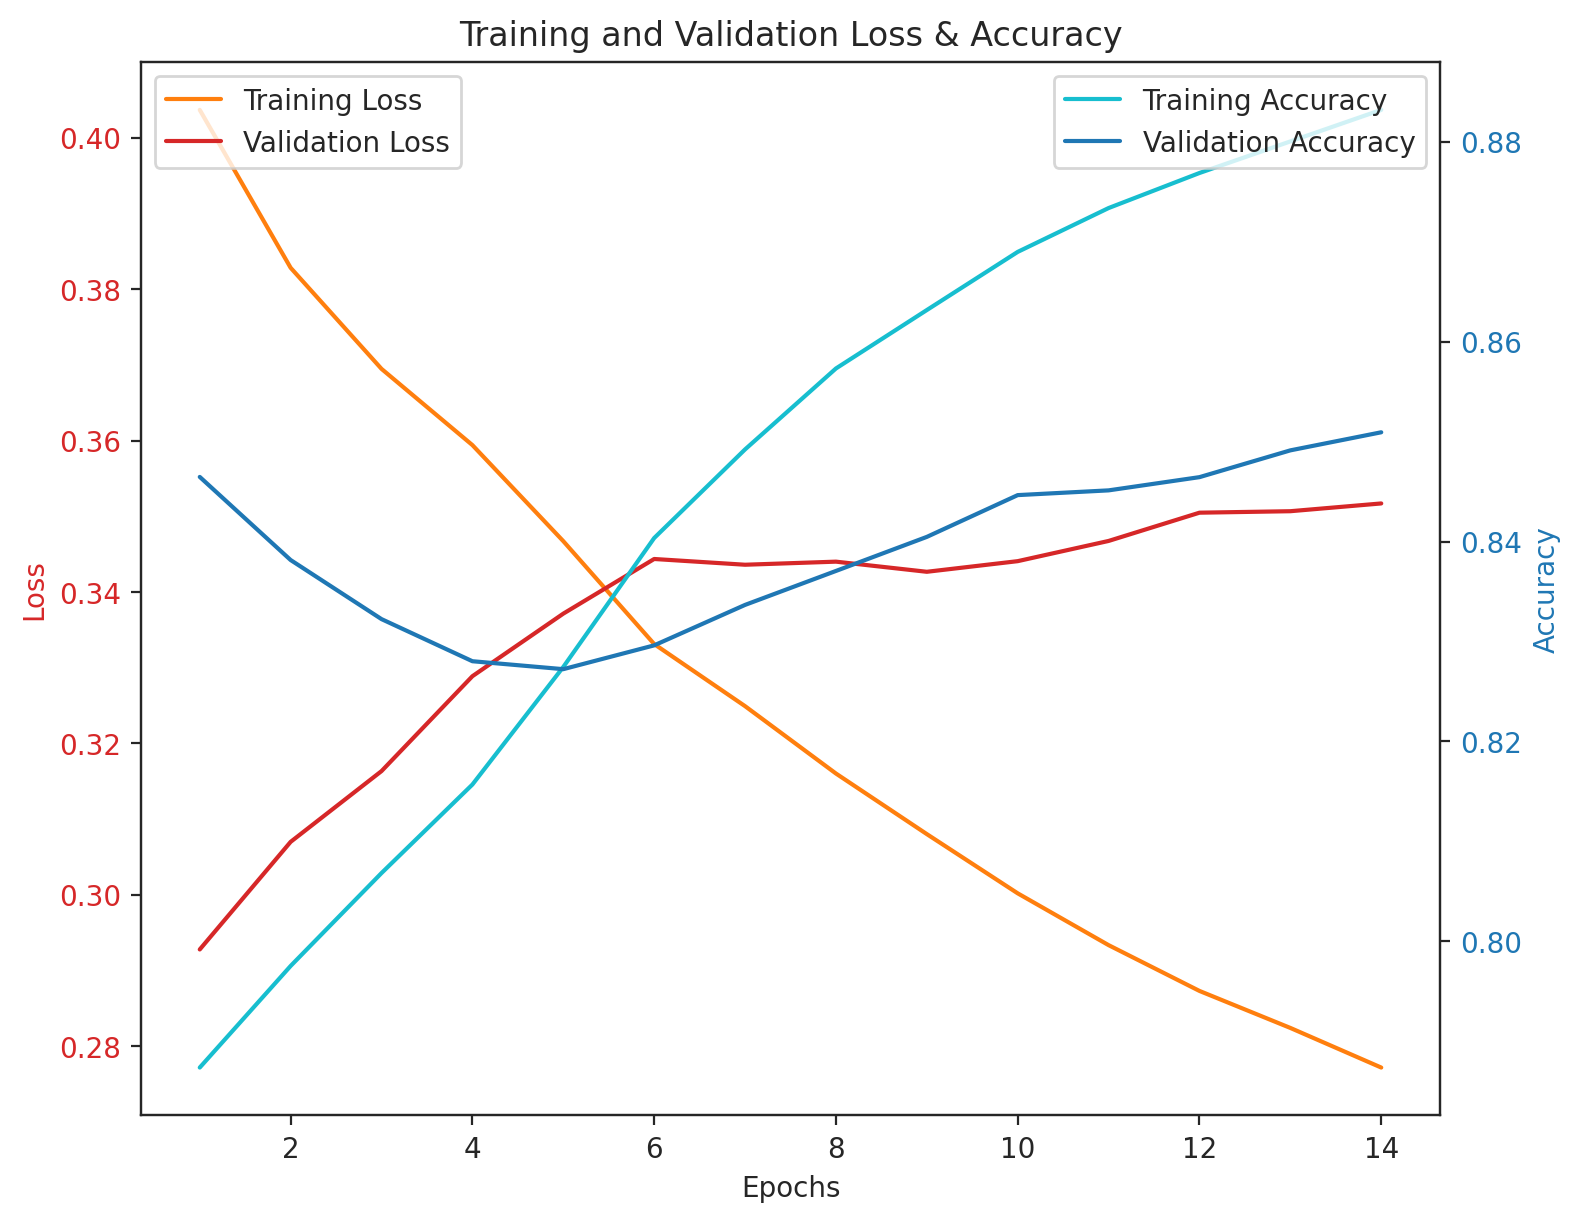

In [ ]:
import matplotlib.pyplot as plt

# Function to equalize the lengths of the lists by padding with the last value
def equalize_list_lengths(list_of_lists):
    max_len = max([len(lst) for lst in list_of_lists])
    return [lst + [lst[-1]] * (max_len - len(lst)) if len(lst) < max_len else lst for lst in list_of_lists]

# Plotting the training and validation accuracy and loss
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Equalize the lengths of the lists
    train_losses = equalize_list_lengths(train_losses)
    val_losses = equalize_list_lengths(val_losses)
    train_accuracies = equalize_list_lengths(train_accuracies)
    val_accuracies = equalize_list_lengths(val_accuracies)

    epochs = range(1, len(train_losses[0]) + 1)

    # Averaging across folds
    avg_train_losses = np.mean(train_losses, axis=0)
    avg_val_losses = np.mean(val_losses, axis=0)
    avg_train_accuracies = np.mean(train_accuracies, axis=0)
    avg_val_accuracies = np.mean(val_accuracies, axis=0)

    # Plotting
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, avg_train_losses, color='tab:orange', label='Training Loss')
    ax1.plot(epochs, avg_val_losses, color=color, label='Validation Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(epochs, avg_train_accuracies, color='tab:cyan', label='Training Accuracy')
    ax2.plot(epochs, avg_val_accuracies, color=color, label='Validation Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Training and Validation Loss & Accuracy')
    plt.show()

# Call the plot function
plot_metrics(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Load the best model for the last fold
model.load_state_dict(torch.load('best_cnn_lstm_model_fold5.pth'))
# Test evaluation
model.eval()

y_pred_test = []
y_true_test = []

test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)
test_loss, correct_test, total_test = 0, 0, 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = model(X_batch)
        loss = criterion(output.squeeze(), y_batch)
        test_loss += loss.item()
        predicted_test = (output.squeeze() > 0.5).float()
        correct_test += (predicted_test == y_batch).sum().item()
        total_test += y_batch.size(0)
        y_pred_test.append(predicted_test)
        y_true_test.append(y_batch)

y_pred_test = torch.cat(y_pred_test).numpy()
y_true_test = torch.cat(y_true_test).numpy()
# Metrics calculation
accuracy = accuracy_score(y_true_test, y_pred_test)
f1 = f1_score(y_true_test, y_pred_test)
precision = precision_score(y_true_test, y_pred_test)
recall = recall_score(y_true_test, y_pred_test)
roc_auc = roc_auc_score(y_true_test, y_pred_test)
# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")



test_loss /= len(test_loader)
test_accuracy = correct_test / total_test

# Print test loss and accuracy

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')



Test Accuracy: 0.9581
F1 Score: 0.9565
Precision: 0.9814
Recall: 0.9328
ROC-AUC: 0.9578
Test Loss: 0.1222, Test Accuracy: 0.9581


y_batch shape: (45,)
predicted_val shape: (45,)


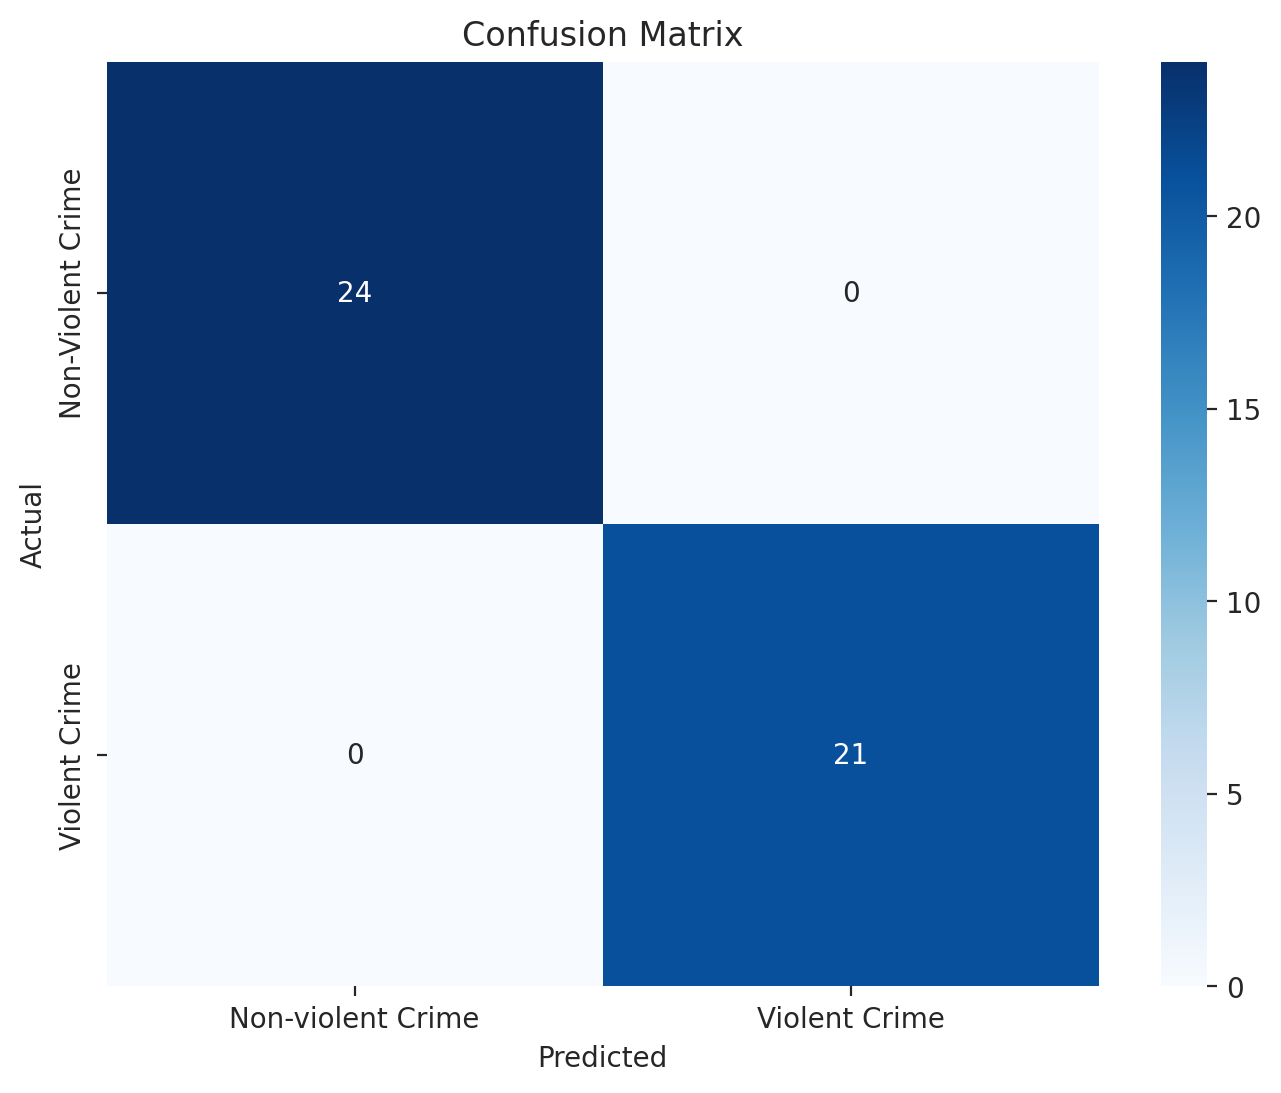

Confusion Matrix:
[[24  0]
 [ 0 21]]
Result for Recall, F1 Score , Precision:  CNN-LSTM:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


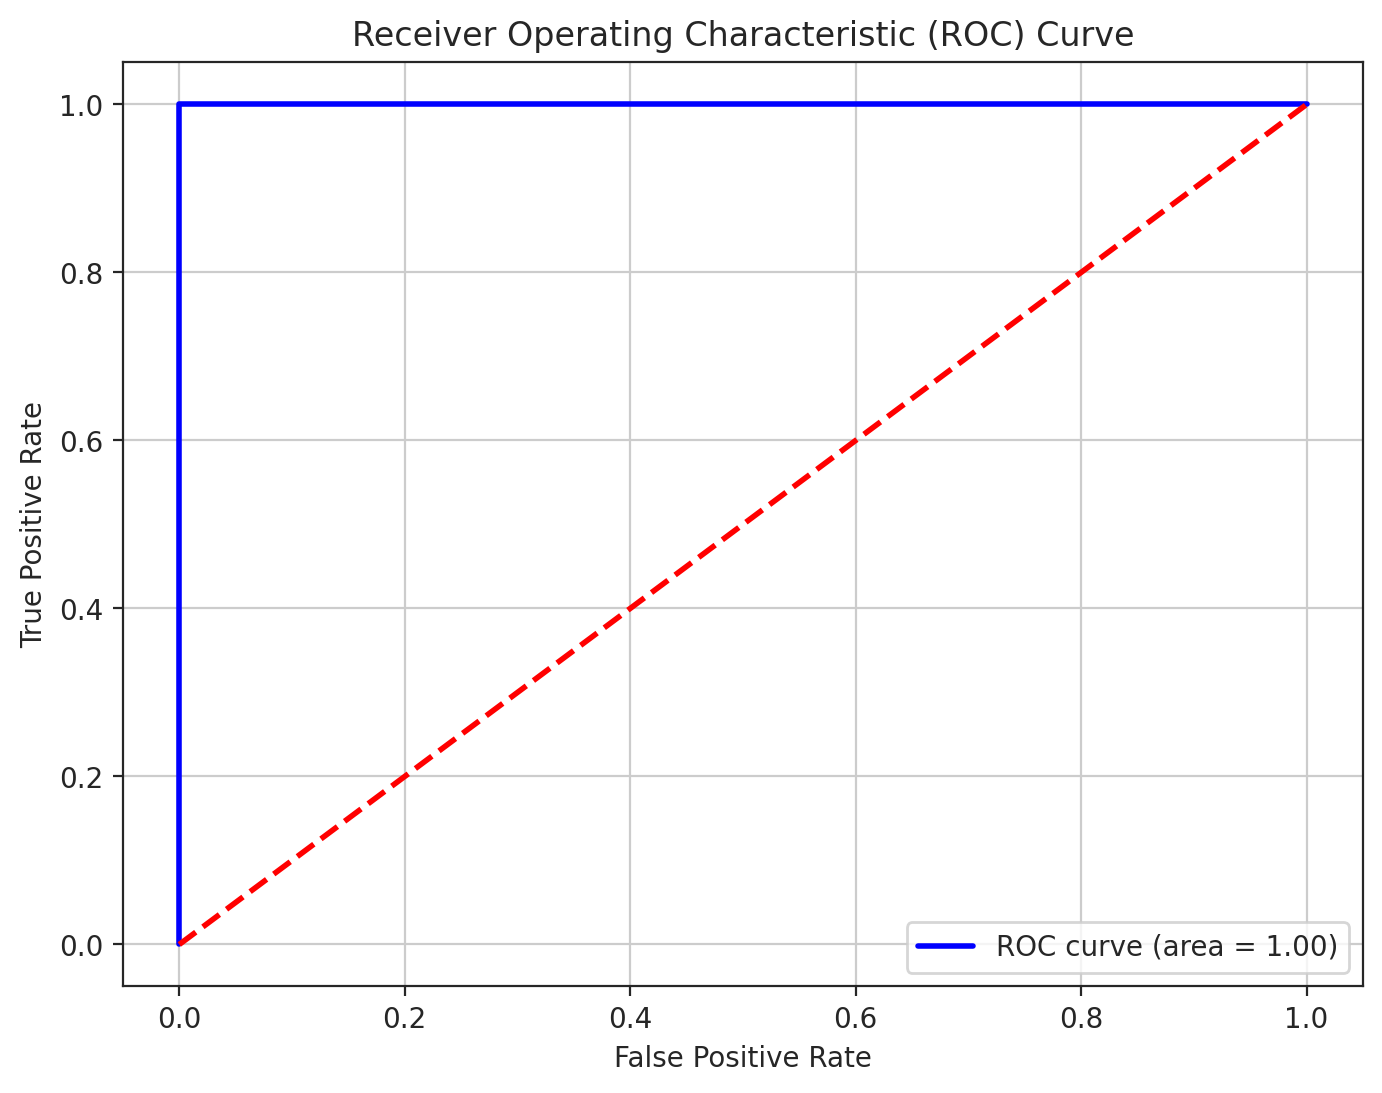

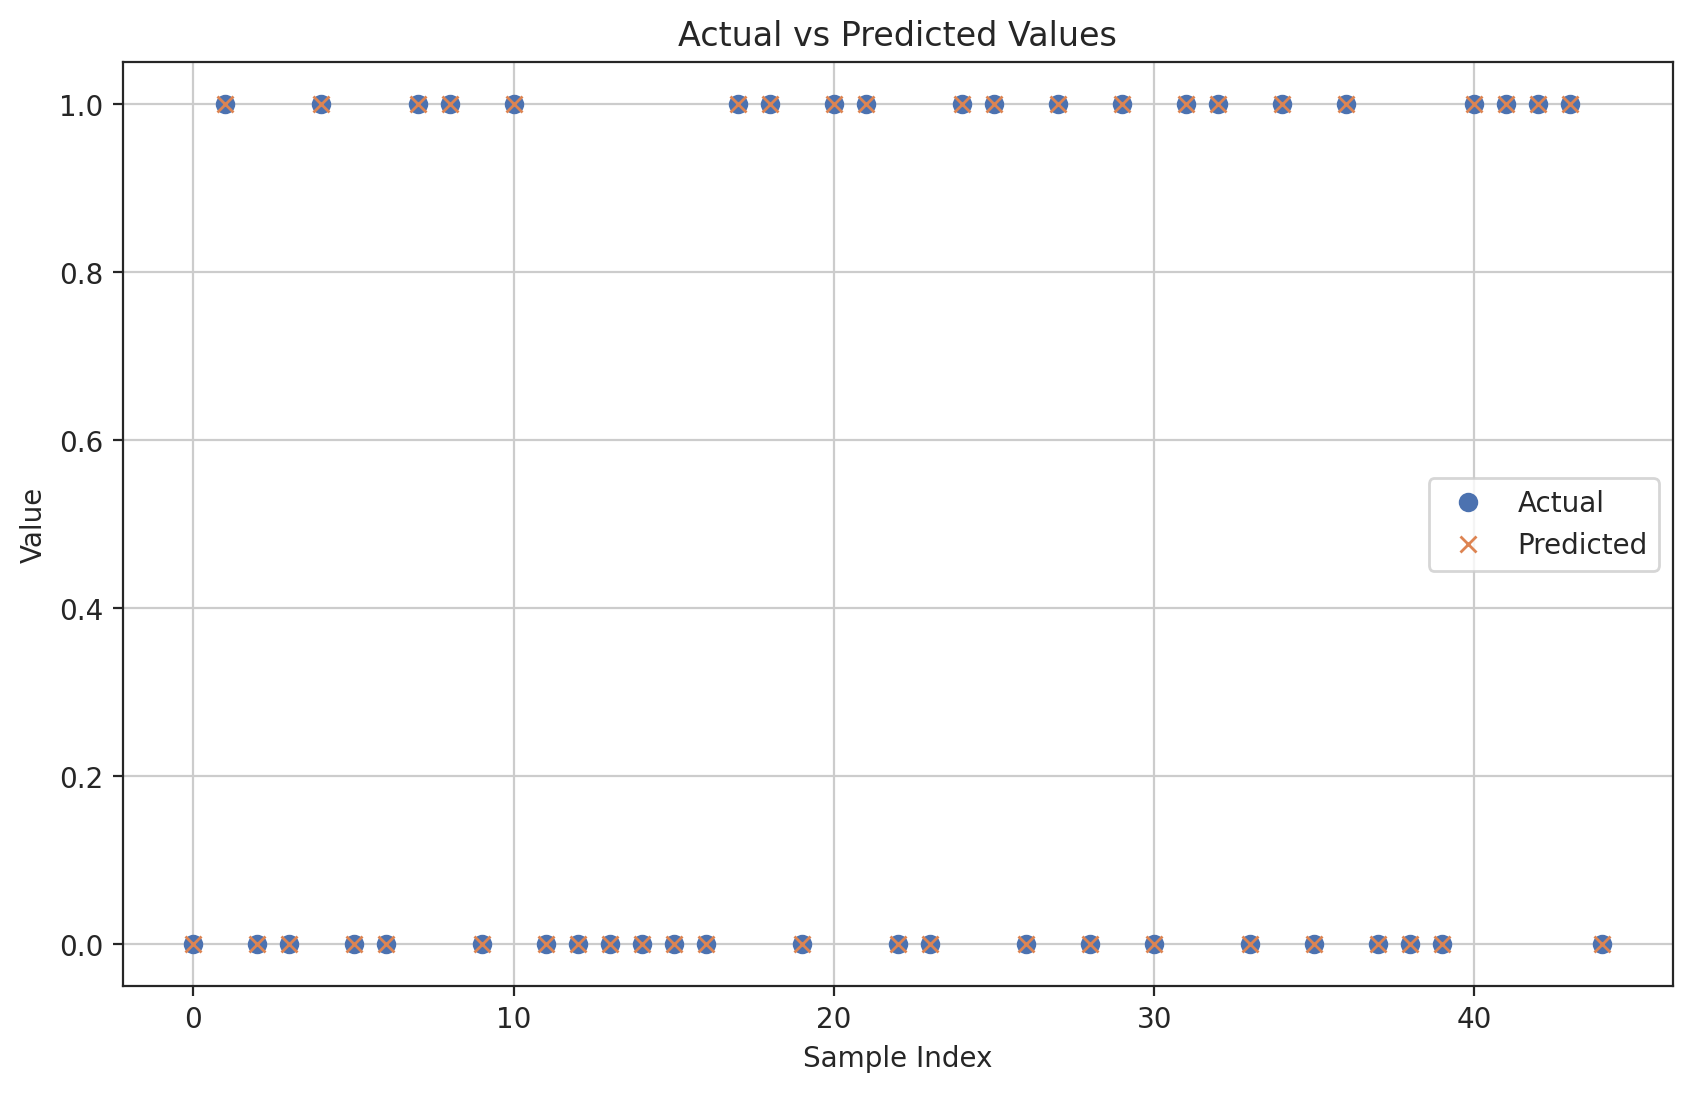

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Convert output to probabilities
y_prob = torch.sigmoid(output).cpu().detach().numpy()  # Get probabilities
predicted_val = (y_prob > 0.5).astype(int)  # Threshold to get binary predictions
# Make sure both y_batch and predicted_val are 1D
y_batch_np = y_batch.cpu().detach().numpy().reshape(-1)  # Convert y_batch to numpy and flatten

# Check shapes before proceeding
print("y_batch shape:", y_batch_np.shape)
print("predicted_val shape:", predicted_val.shape)

# Compute confusion matrix
cm = confusion_matrix(y_batch_np, predicted_val)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-violent Crime', 'Violent Crime'], yticklabels=['Non-Violent Crime', 'Violent Crime'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

# Compute precision, recall, F1 score
precision = precision_score(y_batch_np, predicted_val)
recall = recall_score(y_batch_np, predicted_val)
f1 = f1_score(y_batch_np, predicted_val)

print("Result for Recall, F1 Score , Precision:  CNN-LSTM:")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
# Calculate and plot ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_batch_np, y_prob)
roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(y_batch_np, label='Actual', marker='o', linestyle='None')
plt.plot(predicted_val, label='Predicted', marker='x', linestyle='None')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()


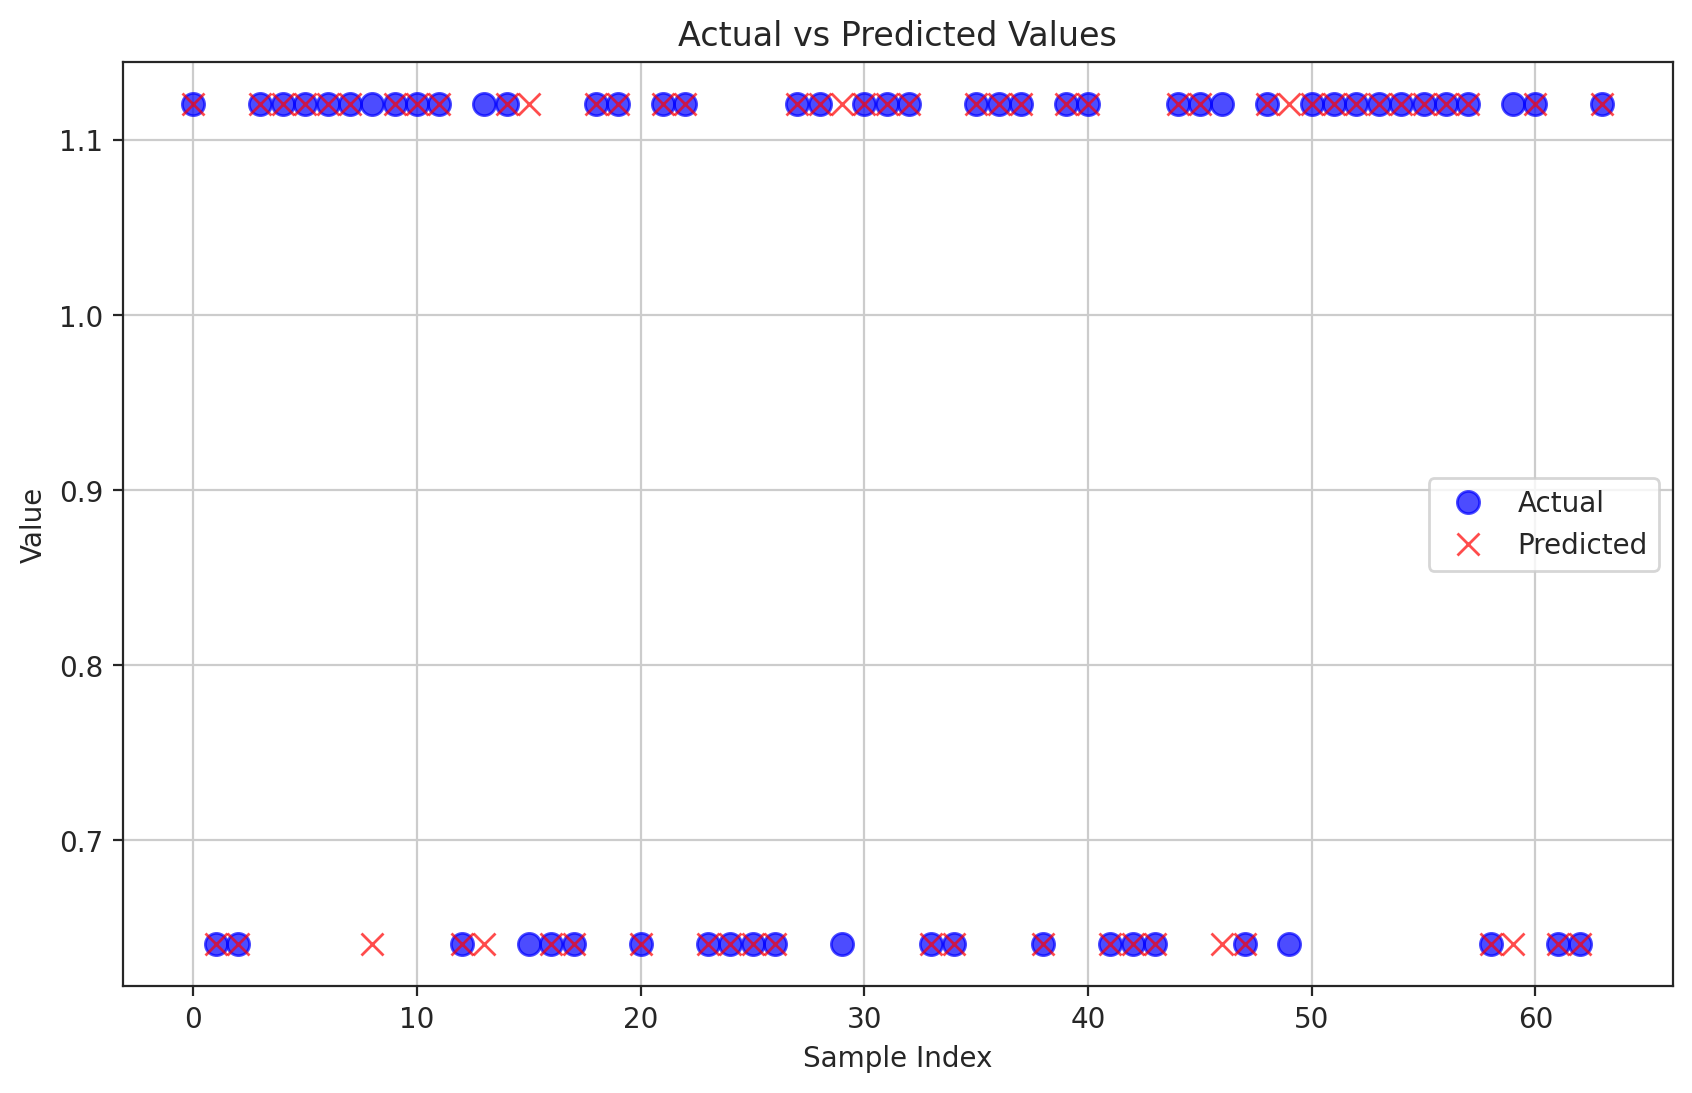

CNN-LSTM Actual vs Predicted Results
     Actual  Predicted
0  1.120442   1.120442
1  0.640625   0.640625
2  0.640625   0.640625
3  1.120442   1.120442
4  1.120442   1.120442
5  1.120442   1.120442
6  1.120442   1.120442
7  1.120442   1.120442
8  1.120442   0.640625
9  1.120442   1.120442


In [ ]:
# Assuming that the scaler was fitted on multiple features, not just the target
# We'll create a new scaler for the target variable

# Fit a scaler on the target variable (if you haven't already done so)
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_batch_np.reshape(-1, 1))

# Now we inverse transform the predictions
y_batch_inverse = scaler_y.inverse_transform(y_batch_np.reshape(-1, 1)).flatten()
predicted_val_inverse = scaler_y.inverse_transform(predicted_val.reshape(-1, 1)).flatten()

# Plot Actual vs. Predicted with clearer markers and colors
plt.figure(figsize=(10, 6))
plt.plot(y_batch_inverse, label='Actual', marker='o', linestyle='None', color='blue', markersize=8, alpha=0.7)
plt.plot(predicted_val_inverse, label='Predicted', marker='x', linestyle='None', color='red', markersize=8, alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame to display actual and predicted values in tabular form
df_results = pd.DataFrame({
    'Actual': y_batch_inverse,
    'Predicted': predicted_val_inverse
})

print("CNN-LSTM Actual vs Predicted Results")
# Display the DataFrame (first few rows)
print(df_results.head(10))

# Optionally, display the full DataFrame
# pd.set_option('display.max_rows', None)
# print(df_results)


In [ ]:


# Define a prediction function that LIME will use
def predict_with_model(X_instance):
    # Convert NumPy array to PyTorch tensor
    X_instance_tensor = torch.tensor(X_instance, dtype=torch.float32)

    # Reshape to the correct dimensions (batch_size, seq_length, input_size)
    X_instance_tensor = X_instance_tensor.reshape(-1, seq_length, X_train_full.shape[2])

    # Forward pass through the model
    with torch.no_grad():
        output = model(X_instance_tensor)

    # Apply sigmoid to get probability-like values
    probabilities = torch.sigmoid(output).numpy()

    # Return as a 2D array [num_instances, 2] for binary classification (non-violent, violent)
    return np.hstack([1 - probabilities.reshape(-1, 1), probabilities.reshape(-1, 1)])

# Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_full.reshape(X_train_full.shape[0], -1).numpy(),  # Flattened data
    mode='classification',
    feature_names=[f'feature_{i}' for i in range(X_train_full.shape[2] * seq_length)],  # Generic feature names
    class_names=['non-violent', 'violent'],
    discretize_continuous=True
)

# Choose an instance from X_test to explain
i = 0  # Index of the instance you want to explain
exp = explainer.explain_instance(
    X_test[i].numpy().reshape(-1),  # Flattened test instance
    predict_with_model,  # Custom prediction function
    num_features=10  # Number of features to display
)

# Display the explanation
exp.show_in_notebook()


In [ ]:
# Define feature names (you can replace these with your actual feature names)
feature_names = ['description', 'domestic', 'arrest', 'is_weekend', 'hour', 'year', 'longitude', 'latitude',
                 'distance_to_vacant_building', 'distance_to_police_station', 'distance_to_school']

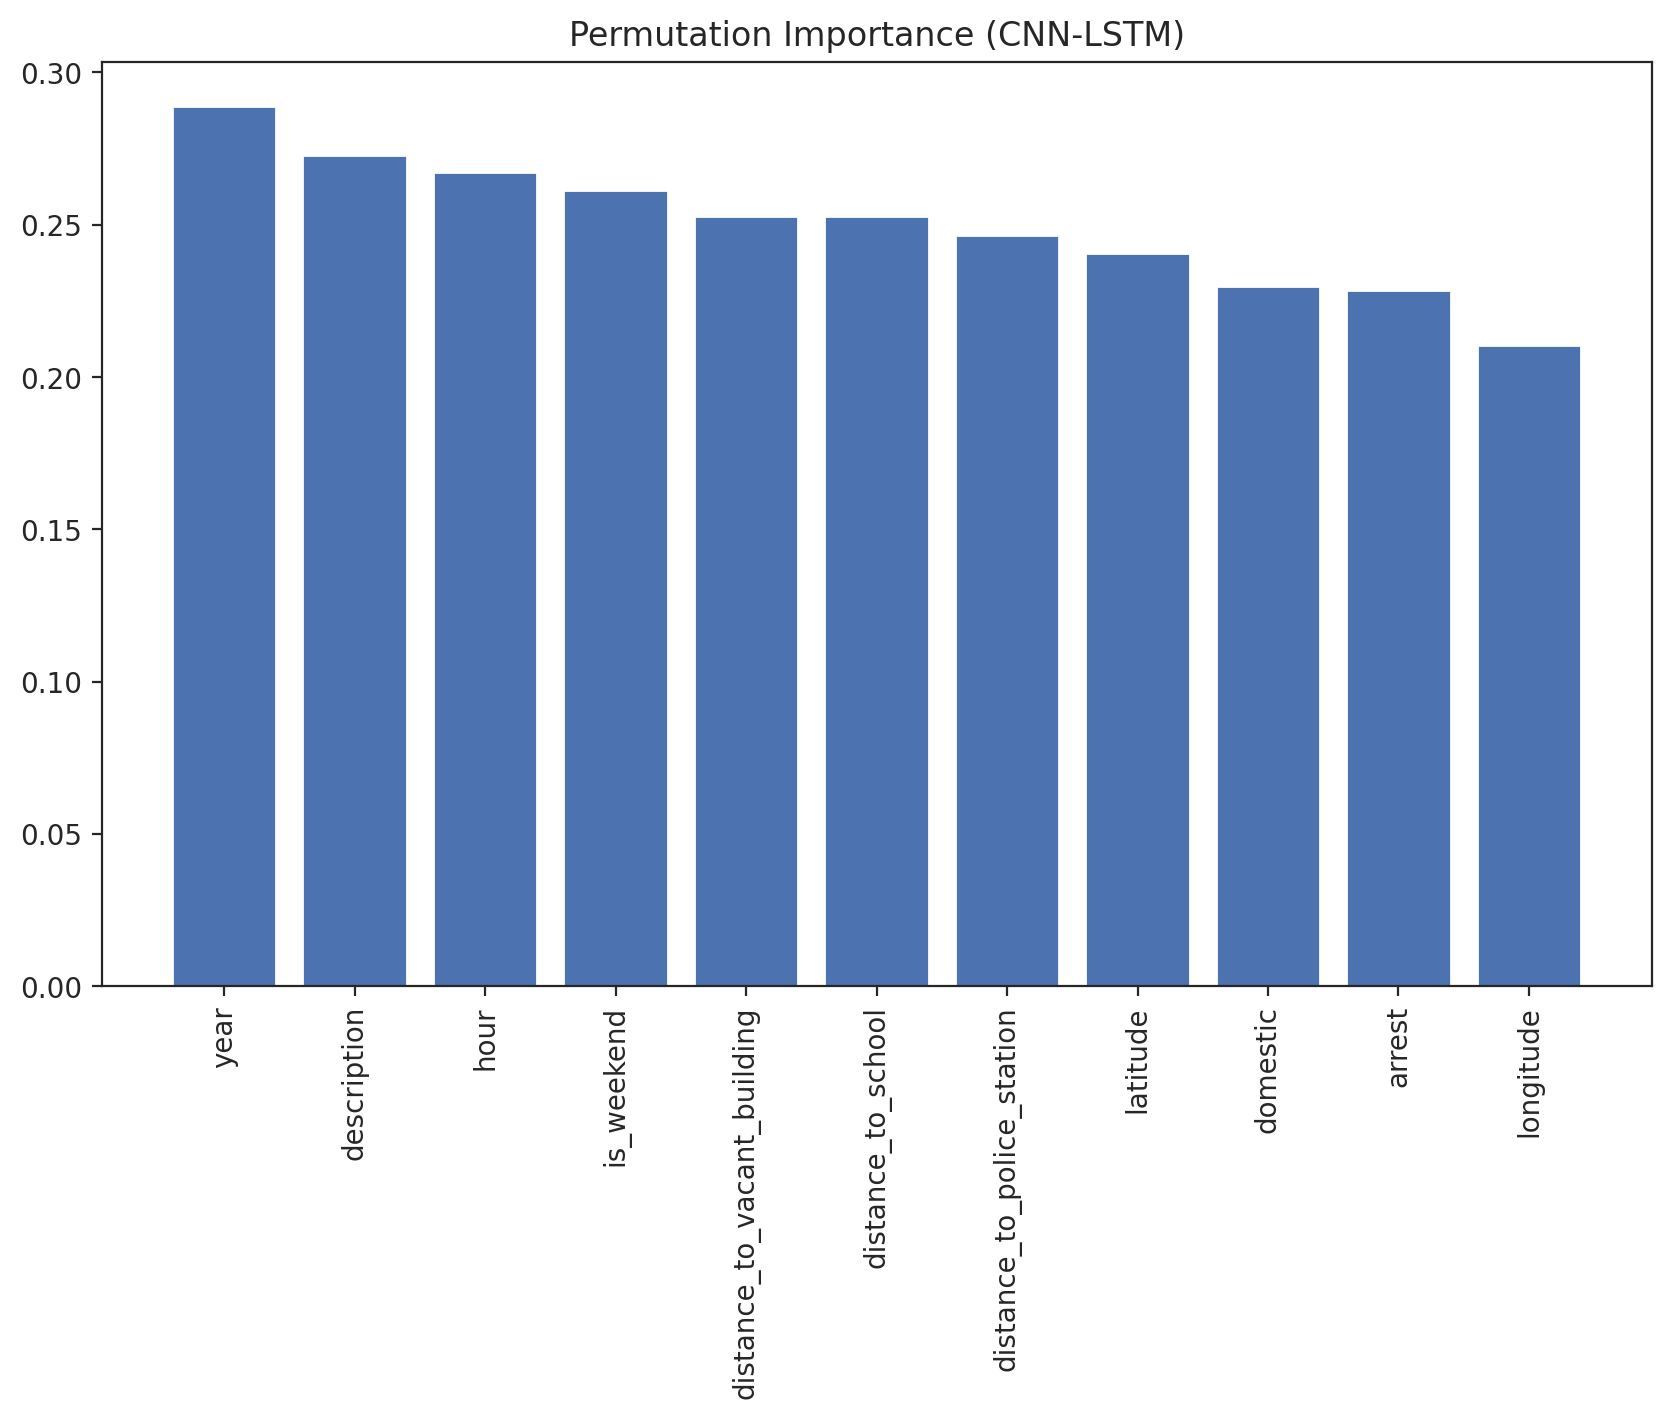

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score  # or other metrics

def permutation_importance(model, X_test, y_test, metric_func, n_repeats=10):
    """
    Calculate permutation importance for a CNN-LSTM model.

    Args:
        model: Trained CNN-LSTM model
        X_test: Test set features (PyTorch tensor)
        y_test: Test set labels (PyTorch tensor)
        metric_func: Function to evaluate model performance (e.g., accuracy_score)
        n_repeats: Number of times to shuffle each feature

    Returns:
        importance: Array of feature importance scores
    """

     # Define feature names (replace with your actual feature names)
    feature_names = ['description', 'domestic', 'arrest', 'is_weekend', 'hour', 'year', 'longitude', 'latitude',
                     'distance_to_vacant_building', 'distance_to_police_station', 'distance_to_school']

    # Step 1: Baseline model performance
    model.eval()
    with torch.no_grad():
        baseline_preds = model(X_test).sigmoid().round()
        baseline_metric = metric_func(y_test.cpu().numpy(), baseline_preds.cpu().numpy())

    # Step 2: Initialize an array to hold the importances
    n_features = X_test.shape[2]
    importance = np.zeros(n_features)

    # Step 3: Permutation importance calculation
    X_test_np = X_test.cpu().numpy()  # Convert test set to numpy for shuffling
    for i in range(n_features):
        metric_decrease = []

        # Shuffle the i-th feature n_repeats times
        for _ in range(n_repeats):
            X_test_permuted = X_test_np.copy()
            np.random.shuffle(X_test_permuted[:, :, i])  # Shuffle the i-th feature across all samples

            # Step 4: Predict with the permuted feature
            X_test_permuted_tensor = torch.tensor(X_test_permuted, dtype=torch.float32)
            with torch.no_grad():
                permuted_preds = model(X_test_permuted_tensor).sigmoid().round()

            # Step 5: Recalculate the metric with permuted feature
            permuted_metric = metric_func(y_test.cpu().numpy(), permuted_preds.cpu().numpy())

            # Calculate the decrease in performance
            metric_decrease.append(baseline_metric - permuted_metric)

        # Average the decrease across n_repeats
        importance[i] = np.mean(metric_decrease)

    return importance

# Usage
# Define your performance metric (e.g., accuracy, F1 score)
metric_func = accuracy_score  # You can also use other metrics like f1_score

# Call permutation importance function
importance = permutation_importance(model, X_test, y_test, metric_func)

# Sort and display feature importance
sorted_indices = np.argsort(importance)[::-1]  # Sort in descending order

# Assuming feature_names is a list of the feature names
features_sorted = np.array(feature_names)[sorted_indices]
importance_sorted = importance[sorted_indices]

# Plot the sorted permutation importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_sorted)), importance_sorted, tick_label=features_sorted)
plt.xticks(rotation=90)
plt.title("Permutation Importance (CNN-LSTM)")
plt.show()


# Saving the train model

In [ ]:
import pickle
pickle.dump(model, open('model_cnnlstm.pkl', 'wb'))